In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
from api_keys import weather_key
import hvplot.pandas
import warnings
warnings.filterwarnings("ignore")

# Data files addresses
research = "../../main_resources/hc_workers/clean_renamed_hcw_df.csv" # research data
complete = "../../main_resources/covid_cases/complete.csv" # state coordinates
state_level = "../../main_resources/covid_cases/state_level_latest.csv" # covid cases by state

# Defined data frames
research_df = pd.read_csv(research,encoding="cp1252")
complete_df = pd.read_csv(complete)
state_level_df = pd.read_csv(state_level)

# Feels

In [44]:
feel = []

for col in research_df.columns:
    if "feel_" in col:
        feel.append(col)

# Defined negative and positive feelings

neg_feel = ['feel_angry',
            'feel_anxious',
            'feel_bored',
            'feel_depressed',
            'feel_discouraged',
            'feel_disgusted',
            'feel_fatigued',
            'feel_frightened',
            'feel_furious',
            'feel_gloomy']

pos_feel = ['feel_at_ease',
            'feel_calm',
            'feel_content',
            'feel_ecstatic',
            'feel_energetic',
            'feel_enthusiastic',
            'feel_excited',
            'feel_inspired',
            'feel_relaxed',
            'feel_satisfied']


## Feels by Job Description

In [45]:
# Feels by job

feel_job_df = research_df[feel].copy().astype("float")
feel_job_df = research_df[["job_description"]].join(feel_job_df)
feel_job_df = feel_job_df.dropna(how="any")

feel_job_df = feel_job_df.groupby("job_description").median()

feel_job_df

,feel_angry,feel_anxious,feel_at_ease,feel_bored,feel_calm,feel_content,feel_depressed,feel_discouraged,feel_disgusted,feel_ecstatic,feel_energetic,feel_enthusiastic,feel_excited,feel_fatigued,feel_frightened,feel_furious,feel_gloomy,feel_inspired,feel_relaxed,feel_satisfied
job_description,,,,,,,,,,,,,,,,,,,,
Consultant,1.0,2.0,4.0,1.0,4.0,4.0,1.0,1.0,1.0,3.0,4.0,4.0,4.0,2.0,1.0,1.0,1.0,4.0,4.0,4.0
Doctor,2.0,2.0,4.0,1.0,3.0,4.0,1.0,1.0,1.0,3.0,4.0,4.0,4.0,2.0,1.0,1.0,1.0,4.0,4.0,4.0
Grade four staff,2.0,3.0,3.0,2.0,3.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,5.0,3.0,3.0,3.0
Grade three staff,2.0,1.0,3.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,3.0,3.0,4.0,2.0,1.0,2.0,1.0,3.0,2.0,4.0
Middle management,1.0,2.0,3.0,1.0,3.0,4.0,1.0,1.0,1.0,3.0,4.0,4.0,4.0,2.5,1.5,2.0,3.0,4.0,3.0,4.0
Nursing staff,2.0,2.0,3.0,1.0,3.0,3.0,1.0,1.0,2.0,3.0,4.0,4.0,4.0,2.0,3.0,3.0,4.0,5.0,4.0,4.0
Top management,1.0,1.0,4.0,1.0,4.0,5.0,1.0,1.0,1.0,3.0,4.0,5.0,5.0,1.0,1.0,1.0,1.0,4.0,4.0,5.0


In [46]:
neg_feel_job_df = pd.DataFrame(feel_job_df[neg_feel].mean(axis=1),columns=["neg_feel"])
pos_feel_job_df = pd.DataFrame(feel_job_df[pos_feel].mean(axis=1),columns=["pos_feel"])

feel_job_df = pd.merge(
              pd.merge(feel_job_df,
                       neg_feel_job_df,on="job_description"),
                       pos_feel_job_df,on="job_description")

# Defined overall Positiveness score as the diff between positive and negative scores

feel_job_df["score_overall"] = feel_job_df["pos_feel"]-feel_job_df["neg_feel"]

feel_job_df[["neg_feel","pos_feel","score_overall"]]

,neg_feel,pos_feel,score_overall
job_description,,,
Consultant,1.2,3.9,2.7
Doctor,1.3,3.8,2.5
Grade four staff,2.6,3.3,0.7
Grade three staff,1.3,2.9,1.6
Middle management,1.6,3.6,2.0
Nursing staff,2.1,3.7,1.6
Top management,1.0,4.3,3.3


In [47]:
# General Positiveness Score by Job Description

print(f"Positive Score: {round(feel_job_df[pos_feel].mean().mean(),1)}")
print(f"Negative Score: {round(feel_job_df[neg_feel].mean().mean(),1)}")
print(f"Overall Score (pos-neg): {round(feel_job_df[pos_feel].mean().mean()-feel_job_df[neg_feel].mean().mean(),1)}")


Positive Score: 3.6
Negative Score: 1.6
Overall Score (pos-neg): 2.1


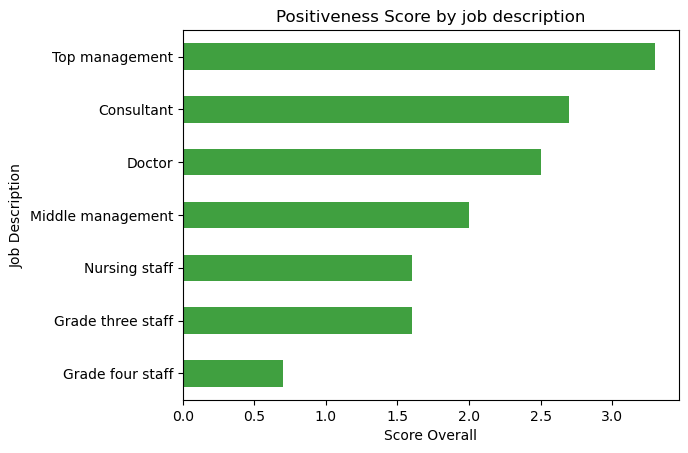

In [48]:
feel_job_df[["score_overall"]].sort_values("score_overall").plot(kind="barh",
                                                                 xlabel="Score Overall",
                                                                 ylabel="Job Description",
                                                                 legend="",
                                                                 title="Positiveness Score by job description",
                                                                 color="green",
                                                                 alpha=0.75)

plt.tight_layout
plt.savefig("Images/pos_score_by_job_description")
plt.show()

## Feels by State

In [49]:
# Feels by State

feel_state_df = research_df[feel].copy().astype("float")
feel_state_df = research_df[["state"]].join(feel_state_df)
feel_state_df = feel_state_df.dropna(how="any")

feel_state_df = feel_state_df.groupby("state").median()

feel_state_df.head()

,feel_angry,feel_anxious,feel_at_ease,feel_bored,feel_calm,feel_content,feel_depressed,feel_discouraged,feel_disgusted,feel_ecstatic,feel_energetic,feel_enthusiastic,feel_excited,feel_fatigued,feel_frightened,feel_furious,feel_gloomy,feel_inspired,feel_relaxed,feel_satisfied
state,,,,,,,,,,,,,,,,,,,,
Andhra Pradesh,2.0,2.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,3.0,4.0,4.0,4.0,2.0,2.0,2.0,3.0,4.0,3.0,4.0
Arunachal Pradesh,1.0,1.0,5.0,1.0,5.0,5.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0
Assam,2.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,1.0,4.0,5.0,5.0,5.0,2.0,1.0,1.0,1.0,5.0,4.0,5.0
Bihar,2.0,2.0,4.0,1.5,4.0,3.5,1.0,1.0,1.0,4.0,4.0,4.0,4.0,1.5,1.0,1.0,1.5,4.0,3.5,4.0
Chandigarh,2.0,3.0,4.0,2.0,4.0,5.0,1.0,1.0,1.0,3.0,4.0,4.0,4.0,3.0,3.0,1.0,1.0,5.0,4.0,5.0


In [50]:
neg_feel_state_df = pd.DataFrame(feel_state_df[neg_feel].mean(axis=1),columns=["neg_feel"])
pos_feel_state_df = pd.DataFrame(feel_state_df[pos_feel].mean(axis=1),columns=["pos_feel"])

feel_state_df = pd.merge(
           pd.merge(feel_state_df,
                    neg_feel_state_df,on="state"),
                    pos_feel_state_df,on="state")

# Defined Positiveness score as the diff between positive and negative scores

feel_state_df["score_overall"] = feel_state_df["pos_feel"]-feel_state_df["neg_feel"]

overall_df = feel_state_df[["neg_feel","pos_feel","score_overall"]]
overall_df

,neg_feel,pos_feel,score_overall
state,,,
Andhra Pradesh,1.70,3.50,1.80
Arunachal Pradesh,1.40,5.00,3.60
Assam,1.30,4.80,3.50
Bihar,1.35,3.90,2.55
Chandigarh,1.80,4.20,2.40
Chhattisgarh,1.30,2.30,1.00
Delhi,1.90,3.90,2.00
Gujarat,2.30,4.10,1.80
Jammu and Kashmir,1.50,2.95,1.45


In [51]:
# General Positiveness Score by State

print(f"Positive Score: {round(feel_state_df[pos_feel].mean().mean(),1)}")
print(f"Negative Score: {round(feel_state_df[neg_feel].mean().mean(),1)}")
print(f"Overall Score (pos-neg): {round(feel_state_df[pos_feel].mean().mean()-feel_state_df[neg_feel].mean().mean(),1)}")
print("-----")
print("In conclusion, the responders to this poll are more likely to feel positive than negative about their jobs.")

Positive Score: 3.7
Negative Score: 1.5
Overall Score (pos-neg): 2.2
-----
In conclusion, the responders to this poll are more likely to feel positive than negative about their jobs.


In [52]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_key}&units={units}&q="

# Loop through the list of research_states and perform a request for data on each
for index,row in feel_state_df.iterrows():
    
    try:
        response = requests.get(query_url + str(index)+",IN").json()
        feel_state_df.loc[index,"longitude"] = response["coord"]["lon"]
        feel_state_df.loc[index,"latitude"] = response["coord"]["lat"]
        feel_state_df.loc[index,"temperature"] = response['main']['temp']
    
    except:
        response = requests.get(query_url + "Hyderabad" + ",IN").json()
        feel_state_df.loc[index,"longitude"] = response["coord"]["lon"]
        feel_state_df.loc[index,"latitude"] = response["coord"]["lat"]
        feel_state_df.loc[index,"temperature"] = response['main']['temp']               
        pass


In [53]:
# Mapping of Positiveness Score
map_plot = feel_state_df.hvplot.points("longitude",
                                       "latitude",
                                       geo = True,
                                       tiles = "OSM",
                                       frame_width = 800,
                                       frame_height = 600,
                                       size="score_overall",
                                       scale=20,
                                       color="score_overall",
                                       cmap="Greens",
                                       alpha=0.5,
                                       label="state",
                                       title="Positiveness")

# Display the map plot
map_plot

:Overlay
   .Tiles.I      :Tiles   [x,y]
   .Points.State :Points   [longitude,latitude]   (score_overall)

# Cases by State

In [54]:
# Merging data frames (covid info + coordinates)
complete_df = complete_df.rename(columns={"Name of State / UT":"State"})

coord_df = pd.merge(complete_df.groupby("State")["Latitude"].apply(lambda x: x[x.index.max()]),
                    complete_df.groupby("State")["Longitude"].apply(lambda x: x[x.index.max()]),
                    on="State")


In [55]:
# group by
cases_df = state_level_df.groupby("State").agg({"Confirmed":"sum",
                                                "Recovered":"sum",
                                                "Deaths":"sum",
                                                "Active":"sum"
                                                })

cases_df = cases_df[["Confirmed","Recovered","Deaths","Active"]]

In [56]:
state_cases_df = pd.merge(coord_df,cases_df,on="State",how="right")
state_cases_df = state_cases_df.dropna(how="any")

In [57]:
# totals
total_confirmed = state_cases_df["Confirmed"].sum()
total_deaths = state_cases_df["Deaths"].sum()
total_active = state_cases_df["Active"].sum()

for index,row in state_cases_df.iterrows():
    
    state_cases_df.loc[index,"%_Confirmed_Country"] = int(row["Confirmed"])/total_confirmed*100
    state_cases_df.loc[index,"%_Deaths_Country"] = int(row["Deaths"])/total_deaths*100
    state_cases_df.loc[index,"%_Active_Country"] = int(row["Active"])/total_active*100
    state_cases_df.loc[index,"Death_Rate"] = int(row["Deaths"])/int(row["Confirmed"])*100
    
state_cases_df["%_Confirmed_Country"] = state_cases_df["%_Confirmed_Country"].map("{:.1f}%".format)
state_cases_df["%_Deaths_Country"] = state_cases_df["%_Deaths_Country"].map("{:.1f}%".format)
state_cases_df["%_Active_Country"] = state_cases_df["%_Active_Country"].map("{:.1f}%".format)


In [58]:
state_cases_df.head()

,Latitude,Longitude,Confirmed,Recovered,Deaths,Active,%_Confirmed_Country,%_Deaths_Country,%_Active_Country,Death_Rate
State,,,,,,,,,,
Andaman and Nicobar Islands,11.7401,92.6586,1123,355,16,752,0.1%,0.0%,0.1%,1.424755
Andhra Pradesh,15.9129,79.7400,196789,112870,1753,82166,9.7%,4.2%,13.6%,0.890802
Arunachal Pradesh,28.2180,94.7278,1948,1245,3,700,0.1%,0.0%,0.1%,0.154004
Assam,26.2006,92.9376,52818,37225,126,15464,2.6%,0.3%,2.6%,0.238555
Bihar,25.0961,85.3131,68148,43820,388,23939,3.4%,0.9%,4.0%,0.569349


# Function definitions

In [59]:
# Function: Linear Regression

def linear_regression(x_values,y_values,x_label,y_label,c_x,c_y):

    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title("Linear Regression")

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.annotate(line_eq,(c_x,c_y),fontsize=15,color="red")

    print(f"The r-value is: {rvalue**2}")


# Function: Regression of second degree

def regression(x,y,x_label,y_label,line_color,c_x,c_y):

    # Fit a second-order polynomial
    coeffs = np.polyfit(x, y, deg=2)
    a, b, c = coeffs

    # Create a new x-axis for plotting the regression line
    x_line = np.linspace(x.min(), x.max(), 100)

    # Evaluate the polynomial at the new x-axis values
    y_line = a*x_line**2 + b*x_line + c

    eq = f"y = {str(round(a,2))}xˆ2 + {str(round(b,2))}ˆx + {str(round(c,2))}"

    plt.annotate(eq,(c_x,c_y),fontsize=15,color="red")

    r_value = np.corrcoef(np.polyval(coeffs, x), y)[0,1]
    print("r_value: ",r_value)

    # Plot the original data and the regression line
    plt.scatter(x, y)
    plt.plot(x_line, y_line,color=line_color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title("2nd Degree Regression")


# Function: Regression of third degree

def regression_third(x,y,x_label,y_label,line_color,c_x,c_y):

    # Fit a second-order polynomial
    coeffs = np.polyfit(x, y, deg=3)
    a, b, c, d = coeffs

    # Create a new x-axis for plotting the regression line
    x_line = np.linspace(x.min(), x.max(), 100)

    # Evaluate the polynomial at the new x-axis values
    y_line = a*x_line**3 + b*x_line**2 + c*x_line + d

    eq = f"y = {str(round(a,2))}xˆ3 + {str(round(b,2))}xˆ2 + {str(round(c,2))}ˆx + {str(round(d,2))}"

    plt.annotate(eq,(c_x,c_y),fontsize=15,color="red")

    r_value = np.corrcoef(np.polyval(coeffs, x), y)[0,1]
    print("r_value: ",r_value)

    # Plot the original data and the regression line
    plt.scatter(x, y)
    plt.plot(x_line, y_line,color=line_color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title("3rd Degree Regression")


# Fuction: Outlier plot

def outliers(districution,title,y_label):
    fig1, ax1 = plt.subplots()
    ax1.set_title(title)
    ax1.set_ylabel(y_label)
    ax1.boxplot(districution)


## Covid Cases

In [60]:
# Mapping of death numbers
map_plot_2 = state_cases_df.hvplot.points(x="Longitude",
                                          y="Latitude",
                                          geo = True,
                                          tiles = "OSM",
                                          frame_width = 800,
                                          frame_height = 600,
                                          size="Deaths",
                                          scale=0.5,
                                          label="State",
                                          color="Deaths",
                                          cmap="Reds",
                                          alpha=0.5,
                                          hover_cols = ["State",
                                                        "Confirmed",
                                                        "Recovered",
                                                        "Active",
                                                        "Death_Rate"],
                                          title = "Deaths")

# Display the map plot
map_plot_2

:Overlay
   .Tiles.I      :Tiles   [x,y]
   .Points.State :Points   [Longitude,Latitude]   (Deaths,State,Confirmed,Recovered,Active,Death_Rate)

In [61]:
# Mapping of Confirmed cases numbers
map_plot_4 = state_cases_df.hvplot.points(x="Longitude",
                                          y="Latitude",
                                          geo = True,
                                          tiles = "OSM",
                                          frame_width = 800,
                                          frame_height = 600,
                                          size="Confirmed",
                                          scale=0.1,
                                          label="State",
                                          color="Black",
                                          #cmap="Black",
                                          alpha=0.25,
                                          hover_cols = ["State",
                                                        "Deaths",
                                                        "Recovered",
                                                        "Active",
                                                        "Death_Rate"],
                                          title = "Confirmed")

# Display the map plot
map_plot_4

:Overlay
   .Tiles.I      :Tiles   [x,y]
   .Points.State :Points   [Longitude,Latitude]   (Confirmed,State,Deaths,Recovered,Active,Death_Rate)

### Death Rate vs Confirmed

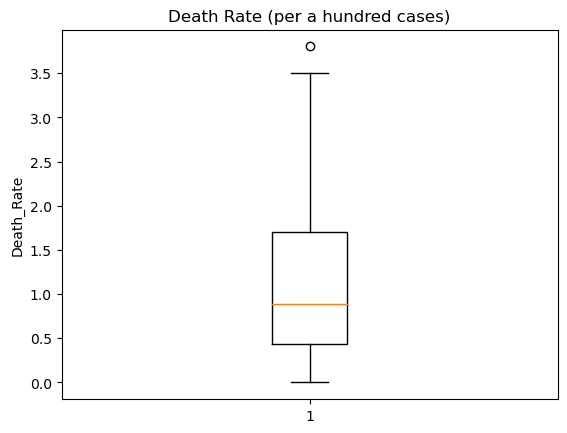

In [62]:
# Analysed Death rate outliars
outliers(state_cases_df["Death_Rate"],"Death Rate (per a hundred cases)","Death_Rate")
plt.tight_layout
plt.show()

#### Correlation (Death Rate vs Confirmed)

r_value:  0.5496347256164887


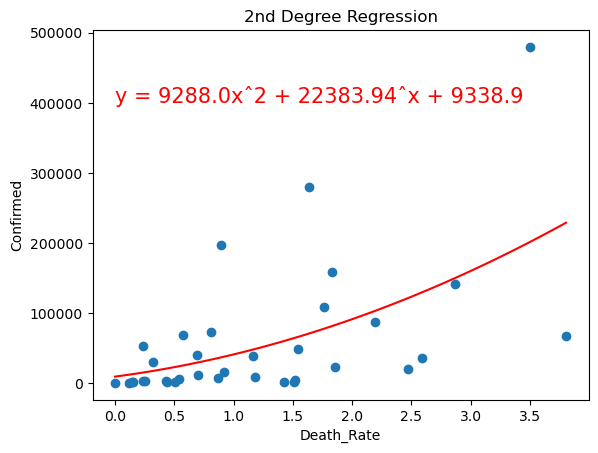

In [63]:
regression(state_cases_df["Death_Rate"],state_cases_df["Confirmed"],"Death_Rate","Confirmed","red",0,400000)
plt.tight_layout
plt.savefig("Images/regression_death_rate_confirmed")
plt.show()

r_value:  0.5504772142311846


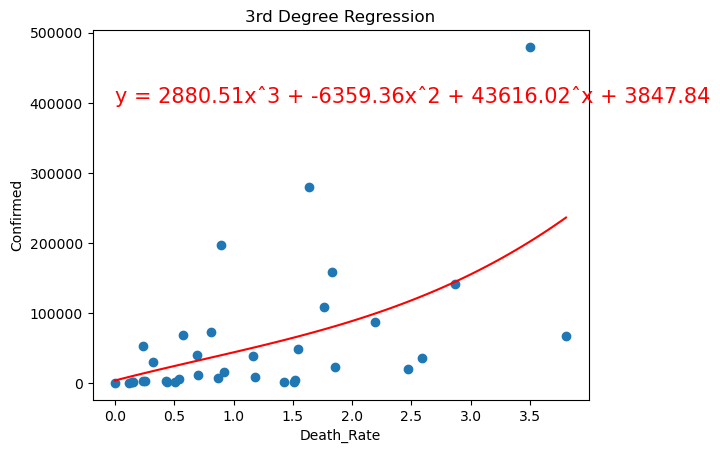

The r-value is: 0.29116750190464835


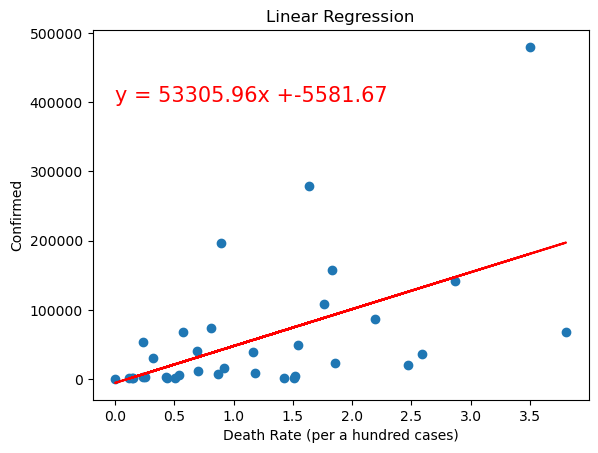

In [64]:
regression_third(state_cases_df["Death_Rate"],state_cases_df["Confirmed"],"Death_Rate","Confirmed","red",0,400000)
plt.tight_layout
plt.show()

linear_regression(state_cases_df["Death_Rate"],state_cases_df["Confirmed"],"Death Rate (per a hundred cases)","Confirmed",0,400000)
plt.tight_layout
plt.show()

## Covid Cases and HCW Well Being

In [65]:
overall_state_df = overall_df.join(state_cases_df)
overall_state_df.head()

,neg_feel,pos_feel,score_overall,Latitude,Longitude,Confirmed,Recovered,Deaths,Active,%_Confirmed_Country,%_Deaths_Country,%_Active_Country,Death_Rate
state,,,,,,,,,,,,,
Andhra Pradesh,1.70,3.5,1.80,15.9129,79.7400,196789,112870,1753,82166,9.7%,4.2%,13.6%,0.890802
Arunachal Pradesh,1.40,5.0,3.60,28.2180,94.7278,1948,1245,3,700,0.1%,0.0%,0.1%,0.154004
Assam,1.30,4.8,3.50,26.2006,92.9376,52818,37225,126,15464,2.6%,0.3%,2.6%,0.238555
Bihar,1.35,3.9,2.55,25.0961,85.3131,68148,43820,388,23939,3.4%,0.9%,4.0%,0.569349
Chandigarh,1.80,4.2,2.40,30.7333,76.7794,1327,777,20,529,0.1%,0.0%,0.1%,1.507159


In [66]:
# Configure the map
map_plot_3 = overall_state_df.hvplot.points(x="Longitude",
                                         y="Latitude",
                                         geo = True,
                                         tiles = "OSM",
                                         frame_width = 800,
                                         frame_height = 600,
                                         size="Death_Rate",
                                         scale=25,
                                         label="State",
                                         color="Death_Rate",
                                         cmap="Blues",
                                         alpha=0.5,
                                         hover_cols = ["State",
                                                       "Confirmed",
                                                       "Recovered",
                                                       "Active",
                                                       "Deaths"],
                                        title="Death Rate")

# Display the map plot
map_plot_3

:Overlay
   .Tiles.I      :Tiles   [x,y]
   .Points.State :Points   [Longitude,Latitude]   (Death_Rate,Confirmed,Recovered,Active,Deaths)

### Death Rate vs Positiveness Score

#### Correlation (Death Rate vs Positiveness Score)

r_value:  0.5168232739369751


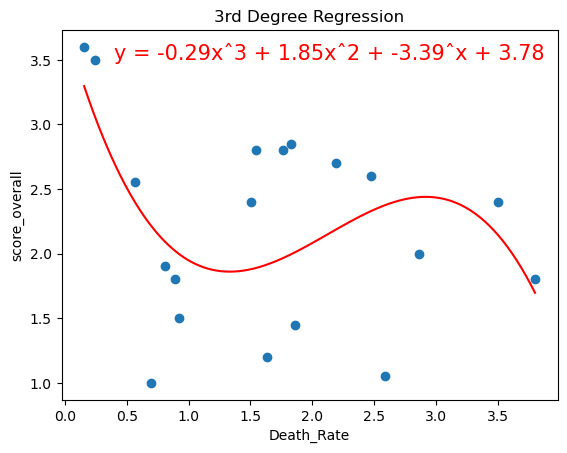

In [67]:
regression_third(overall_state_df["Death_Rate"],overall_state_df["score_overall"],"Death_Rate","score_overall","red",0.4,3.5)
plt.tight_layout
plt.savefig("Images/regression_death_rate_positiveness.png")
plt.show()

r_value:  0.32720829694807874


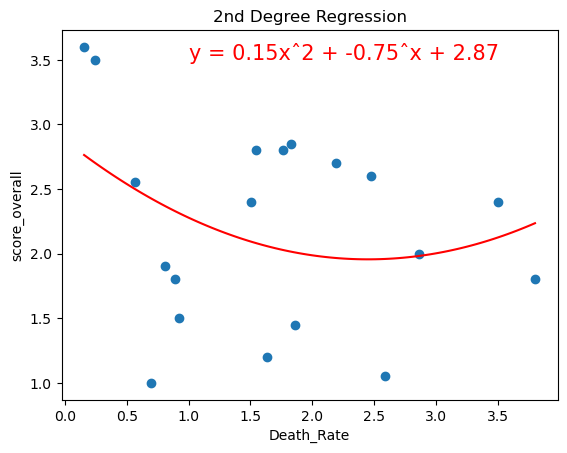

The r-value is: 0.054074142545078877


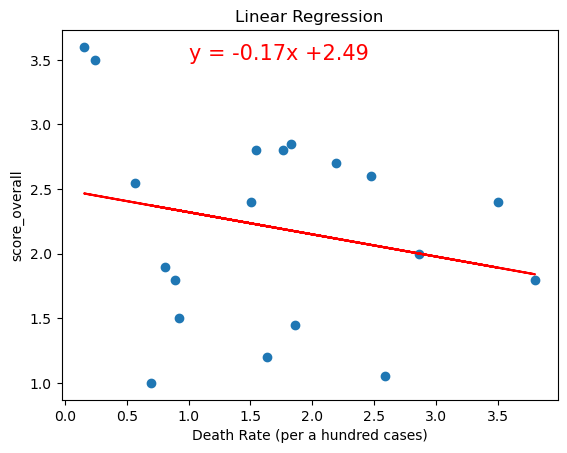

In [68]:
regression(overall_state_df["Death_Rate"],overall_state_df["score_overall"],"Death_Rate","score_overall","red",1,3.5)
plt.tight_layout
plt.show()

linear_regression(overall_state_df["Death_Rate"],overall_state_df["score_overall"],"Death Rate (per a hundred cases)","score_overall",1,3.5)
plt.tight_layout
plt.show()

### Other associations

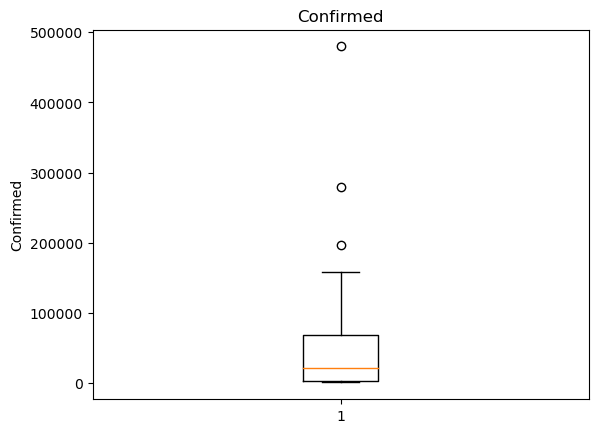

r_value:  0.3202918740848685


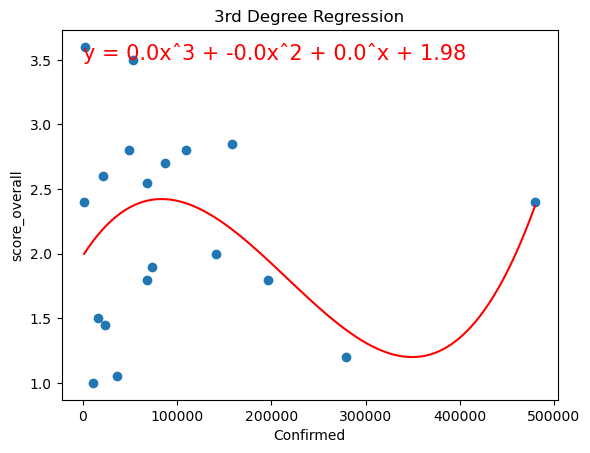

r_value:  0.07372932309351203


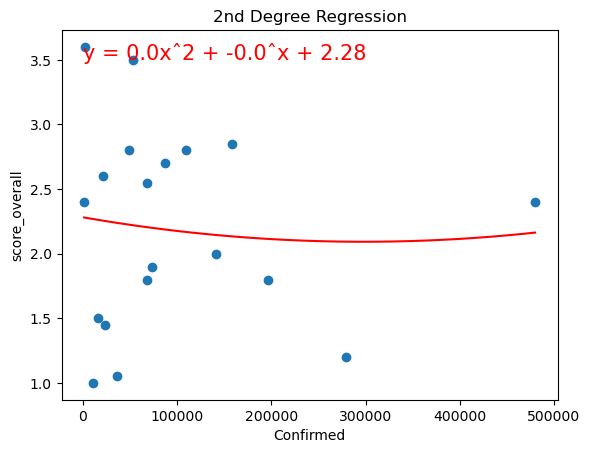

The r-value is: 0.0029206339284293635


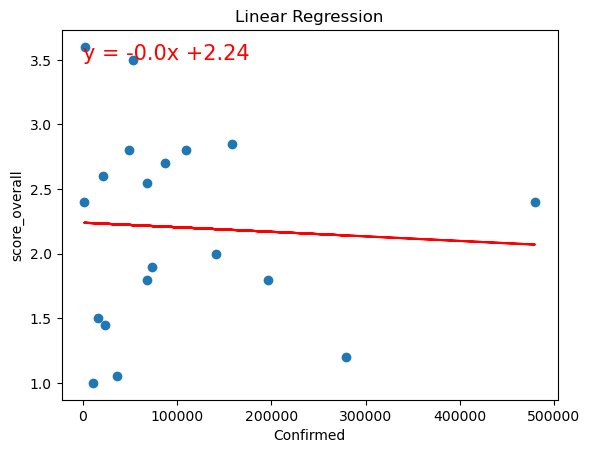

In [69]:
# Confirmed vs score_overall

outliers(state_cases_df["Confirmed"],"Confirmed","Confirmed")
plt.tight_layout
plt.show()

regression_third(overall_state_df["Confirmed"],overall_state_df["score_overall"],"Confirmed","score_overall","red",1,3.5)
plt.tight_layout
plt.show()

regression(overall_state_df["Confirmed"],overall_state_df["score_overall"],"Confirmed","score_overall","red",1,3.5)
plt.tight_layout
plt.show()

linear_regression(overall_state_df["Confirmed"],overall_state_df["score_overall"],"Confirmed","score_overall",1,3.5)
plt.tight_layout
plt.show()

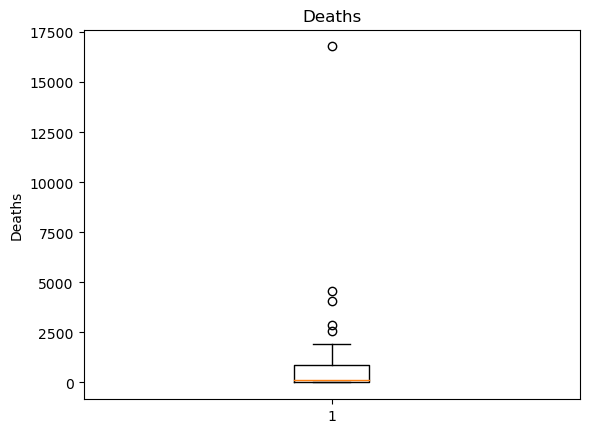

r_value:  0.23766302892062655


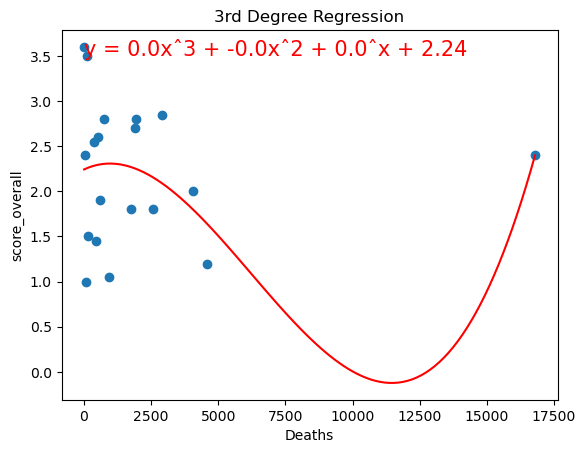

r_value:  0.19440163127452995


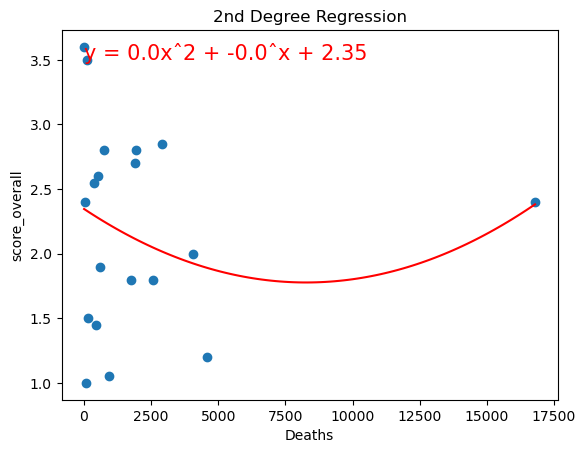

The r-value is: 0.00023102119803017202


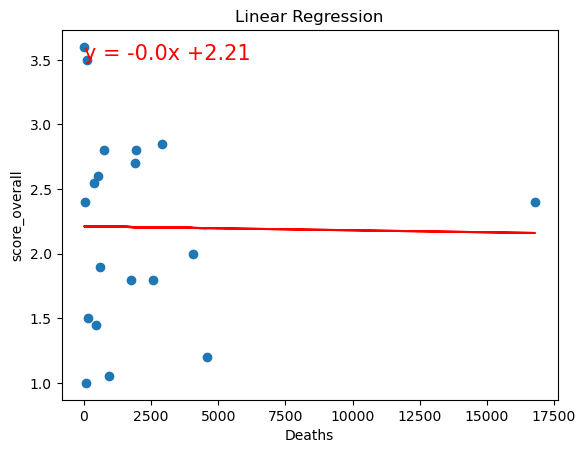

In [70]:
# Deaths vs score_overall

outliers(state_cases_df["Deaths"],"Deaths","Deaths")
plt.tight_layout
plt.show()

regression_third(overall_state_df["Deaths"],overall_state_df["score_overall"],"Deaths","score_overall","red",1,3.5)
plt.tight_layout
plt.show()

regression(overall_state_df["Deaths"],overall_state_df["score_overall"],"Deaths","score_overall","red",1,3.5)
plt.tight_layout
plt.show()

linear_regression(overall_state_df["Deaths"],overall_state_df["score_overall"],"Deaths","score_overall",1,3.5)
plt.tight_layout
plt.show()


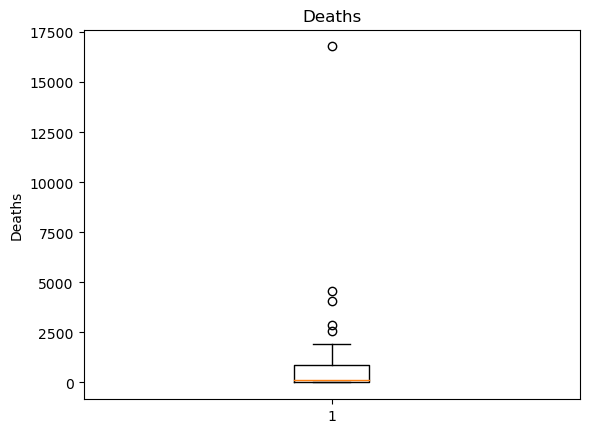

In [71]:
# Active vs score_overall
outliers(state_cases_df["Deaths"],"Deaths","Deaths")
plt.tight_layout
plt.show()


The r-value is: 0.00023102119803017202


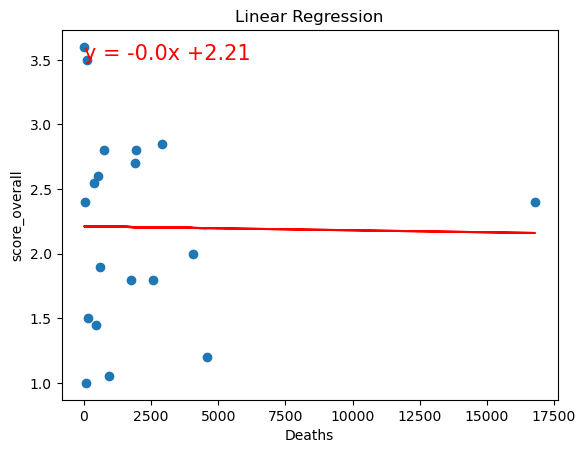

In [72]:
linear_regression(overall_state_df["Deaths"],overall_state_df["score_overall"],"Deaths","score_overall",1,3.5)
plt.tight_layout
plt.savefig("Images/regression_deaths_positiveness.png")
plt.show()

r_value:  0.23766302892062655


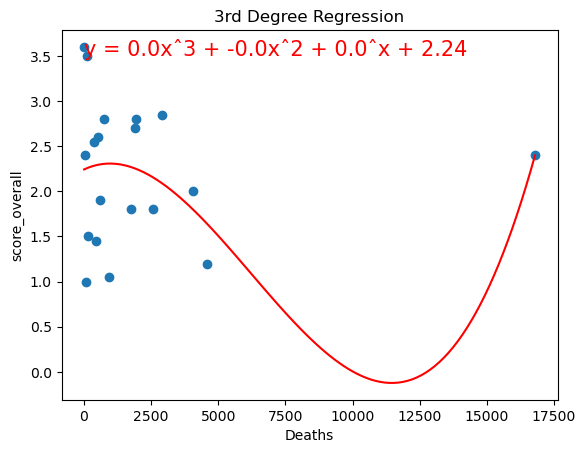

r_value:  0.19440163127452995


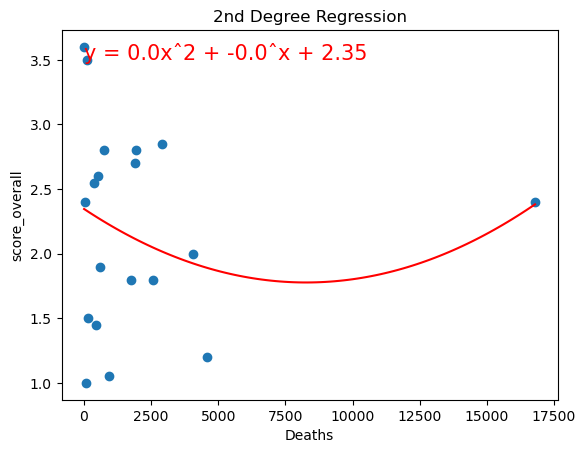

In [73]:
regression_third(overall_state_df["Deaths"],overall_state_df["score_overall"],"Deaths","score_overall","red",1,3.5)
plt.tight_layout
plt.show()

regression(overall_state_df["Deaths"],overall_state_df["score_overall"],"Deaths","score_overall","red",1,3.5)
plt.tight_layout
plt.show()